### Importando Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time
from plotnine import *
from siuba import *
from sklearn.cluster import KMeans

### Importando os Dados

In [2]:
df_backup = pd.read_excel("Base_Case_Gestao_Carteira_.xlsx",
                          sheet_name= "Base")   ## base de backup

df = df_backup.copy() ## base principal 

mcc_decode = pd.read_excel("Base_Case_Gestao_Carteira_.xlsx",
                          sheet_name= "mcc_decode") ## Código setorial do comerciante

geo_decode = pd.read_excel("Base_Case_Gestao_Carteira_.xlsx",
                          sheet_name= "geography_decode") ## Código geográfico do cliente


In [3]:
## Primeiras impressões da base
df.head()
df.tail()


,Id,dt_desembolso,prazo_meses,vlr_desembolsado,perc_retencao,vlr_pmt_semanal,vlr_pagamento_semanal,vlr_tpv_acumulado_7d,vlr_sd_operacional_final,vlr_sd_operacional_principal_final,dsc_tipo_empresa,geographykey,mcckey,dt_referencia
137730,999741,2021-01-01,15,125.76255,0.08,2.787828,0.0,0.0,121.472458,117.340027,MEI,NaN,NaN,2021-05-03
137731,999741,2021-01-01,15,125.76255,0.08,2.787828,0.0,0.0,122.080444,117.340027,MEI,NaN,NaN,2021-05-10
137732,999741,2021-01-01,15,125.76255,0.08,2.787828,0.0,0.0,123.510791,117.340027,MEI,NaN,NaN,2021-05-17
137733,999741,2021-01-01,15,125.76255,0.08,2.787828,0.0,0.0,124.958098,117.340027,MEI,NaN,NaN,2021-05-24
137734,999741,2021-01-01,15,125.76255,0.08,0.796522,0.0,0.0,126.422366,117.340027,MEI,NaN,NaN,2021-05-31


In [3]:
df.info() ## infos sobre as colunas e os tipos 
geo_decode.info()
mcc_decode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Id                                  137735 non-null  int64         
 1   dt_desembolso                       137735 non-null  datetime64[ns]
 2   prazo_meses                         137735 non-null  int64         
 3   vlr_desembolsado                    137735 non-null  float64       
 4   perc_retencao                       137735 non-null  float64       
 5   vlr_pmt_semanal                     137735 non-null  float64       
 6   vlr_pagamento_semanal               137735 non-null  float64       
 7   vlr_tpv_acumulado_7d                137735 non-null  float64       
 8   vlr_sd_operacional_final            137735 non-null  float64       
 9   vlr_sd_operacional_principal_final  137735 non-null  float64       
 10  dsc_tipo

## EDA


##### Como as variáveis numéricas estão distribuídas?

In [6]:
df.describe()

,Id,prazo_meses,vlr_desembolsado,perc_retencao,vlr_pmt_semanal,vlr_pagamento_semanal,vlr_tpv_acumulado_7d,vlr_sd_operacional_final,vlr_sd_operacional_principal_final,geographykey,mcckey
count,137735.000000,137735.000000,137735.000000,137735.000000,137735.000000,137735.000000,137735.000000,137735.000000,137735.000000,6.994400e+04,69944.000000
mean,495539.759887,16.379417,6131.625630,0.124643,92.504429,75.115044,630.521669,5612.689728,5531.820129,4.790009e+07,5826.298339
std,289277.242793,2.894944,11163.298828,0.079813,192.829093,265.862046,2096.749937,10622.922683,10429.910895,2.976037e+07,848.114518
min,246.000000,6.000000,0.519013,0.010000,0.001858,-135.745277,-4018.808190,-148.476021,-148.476021,1.000000e+00,742.000000
25%,245447.000000,15.000000,745.449823,0.080000,7.819975,0.000000,0.000000,594.912431,584.547614,2.023012e+07,5462.000000
50%,492410.000000,15.000000,2388.824970,0.120000,28.434411,9.032955,1.891025,2060.097400,2034.652175,4.582500e+07,5661.000000
75%,741501.000000,18.000000,6573.645898,0.150000,90.248247,59.292057,426.856665,5858.779139,5781.767047,7.569731e+07,5921.000000
max,999741.000000,21.000000,129316.965643,1.000000,2851.689020,35095.553559,64775.773309,133227.139975,129316.965643,9.990000e+07,9311.000000


In [7]:
print(" \nTotal de NaN em cada coluna do DataFrame : \n\n",
      df.isnull().sum()) ## muito preocupante, precisamos lidar com isso

 
Total de NaN em cada coluna do DataFrame : 

 Id                                        0
dt_desembolso                             0
prazo_meses                               0
vlr_desembolsado                          0
perc_retencao                             0
vlr_pmt_semanal                           0
vlr_pagamento_semanal                     0
vlr_tpv_acumulado_7d                      0
vlr_sd_operacional_final                  0
vlr_sd_operacional_principal_final        0
dsc_tipo_empresa                      18184
geographykey                          67791
mcckey                                67791
dt_referencia                             0
dtype: int64


In [63]:
df >> distinct(_.Id) ### Número de clientes na base

,Id
0,246
1,318
2,501
3,575
4,754
...,...
6801,999165
6802,999234
6803,999384
6804,999689


##### Distribuição das variáveis por quartil do valor emprestado (vlr_desembolsado)

<AxesSubplot:xlabel='vlr_pmt_semanal', ylabel='Count'>

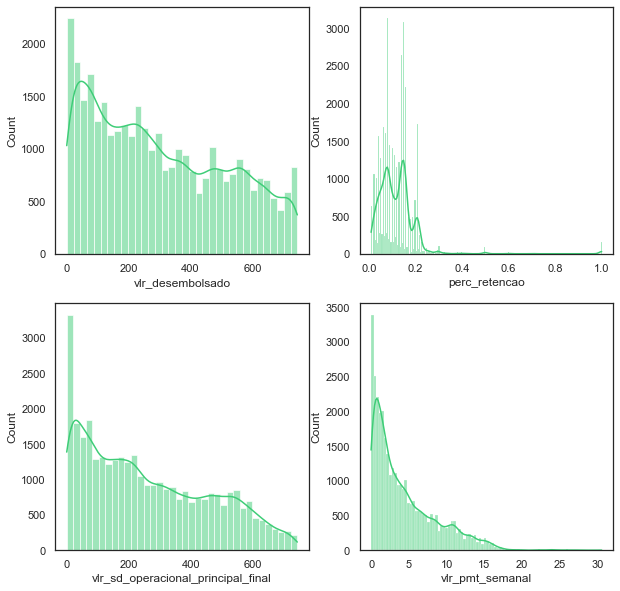

In [4]:
## Primeiro Quartil
teste = df >> filter(_.vlr_desembolsado > 0.519013,_.vlr_desembolsado < 745 )
sns.set(style="white")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=teste, x="vlr_desembolsado", kde=True, color="#3ECD77", ax=axs[0, 0])
sns.histplot(data=teste, x="perc_retencao", kde=True, color="#3ECD77", ax=axs[0, 1])
sns.histplot(data=teste, x="vlr_sd_operacional_principal_final", kde=True, color="#3ECD77", ax=axs[1, 0])
sns.histplot(data=teste, x="vlr_pmt_semanal", kde=True, color="#3ECD77", ax=axs[1, 1])


<AxesSubplot:xlabel='vlr_pmt_semanal', ylabel='Count'>

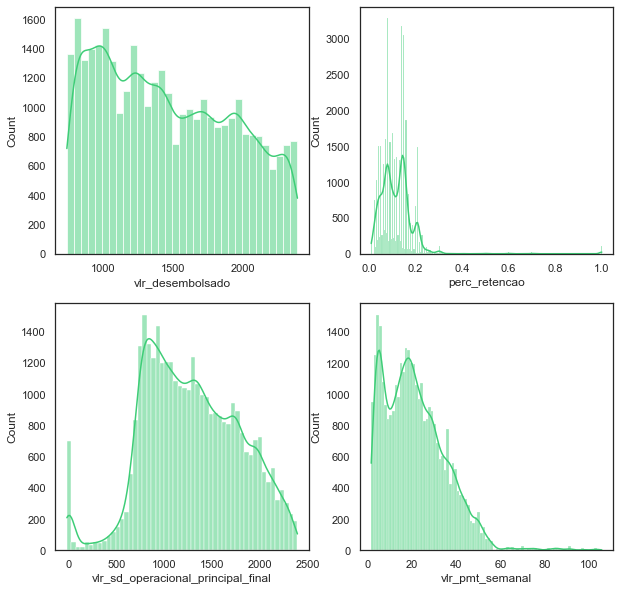

In [5]:
## Segundo Quartil
teste = df >> filter(_.vlr_desembolsado > 745,_.vlr_desembolsado < 2388 )
sns.set(style="white")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=teste, x="vlr_desembolsado", kde=True, color="#3ECD77", ax=axs[0, 0])
sns.histplot(data=teste, x="perc_retencao", kde=True, color="#3ECD77", ax=axs[0, 1])
sns.histplot(data=teste, x="vlr_sd_operacional_principal_final", kde=True, color="#3ECD77", ax=axs[1, 0])
sns.histplot(data=teste, x="vlr_pmt_semanal", kde=True, color="#3ECD77", ax=axs[1, 1])

<AxesSubplot:xlabel='vlr_pmt_semanal', ylabel='Count'>

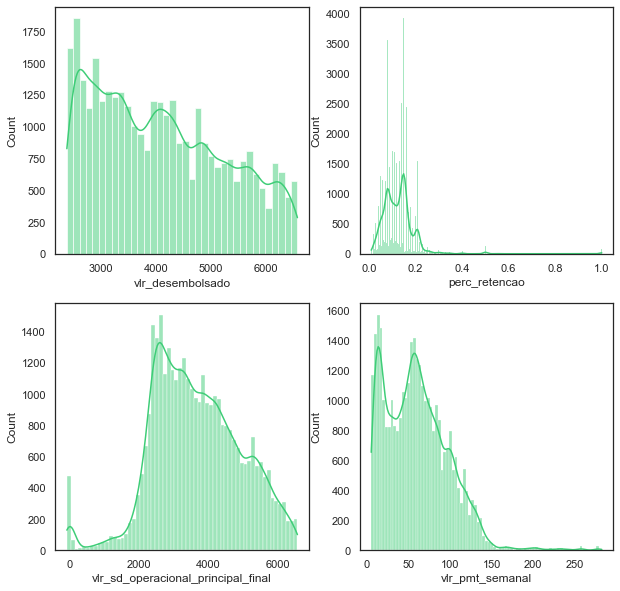

In [6]:
## Terceiro Quartil
teste = df >> filter(_.vlr_desembolsado > 2388,_.vlr_desembolsado < 6573 )
sns.set(style="white")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=teste, x="vlr_desembolsado", kde=True, color="#3ECD77", ax=axs[0, 0])
sns.histplot(data=teste, x="perc_retencao", kde=True, color="#3ECD77", ax=axs[0, 1])
sns.histplot(data=teste, x="vlr_sd_operacional_principal_final", kde=True, color="#3ECD77", ax=axs[1, 0])
sns.histplot(data=teste, x="vlr_pmt_semanal", kde=True, color="#3ECD77", ax=axs[1, 1])

<AxesSubplot:xlabel='vlr_pmt_semanal', ylabel='Count'>

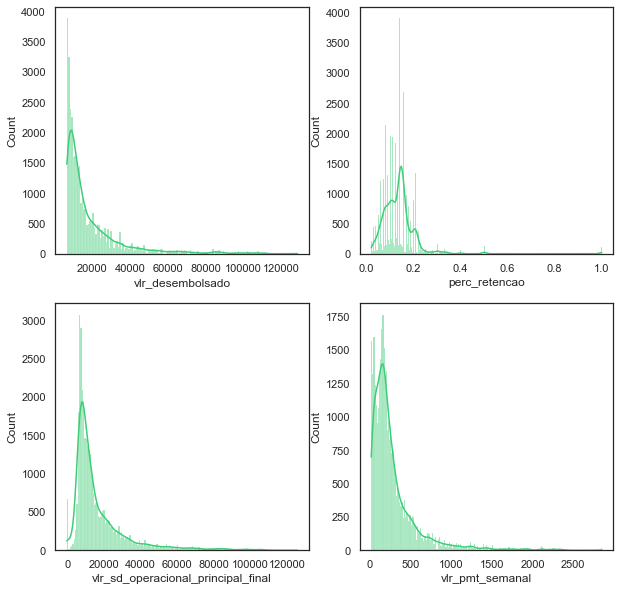

In [8]:
## Quarto Quartil
teste = df >> filter(_.vlr_desembolsado > 6573,_.vlr_desembolsado < 129316 )
sns.set(style="white")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=teste, x="vlr_desembolsado", kde=True, color="#3ECD77", ax=axs[0, 0])
sns.histplot(data=teste, x="perc_retencao", kde=True, color="#3ECD77", ax=axs[0, 1])
sns.histplot(data=teste, x="vlr_sd_operacional_principal_final", kde=True, color="#3ECD77", ax=axs[1, 0])
sns.histplot(data=teste, x="vlr_pmt_semanal", kde=True, color="#3ECD77", ax=axs[1, 1])

<AxesSubplot:xlabel='vlr_pmt_semanal', ylabel='Count'>

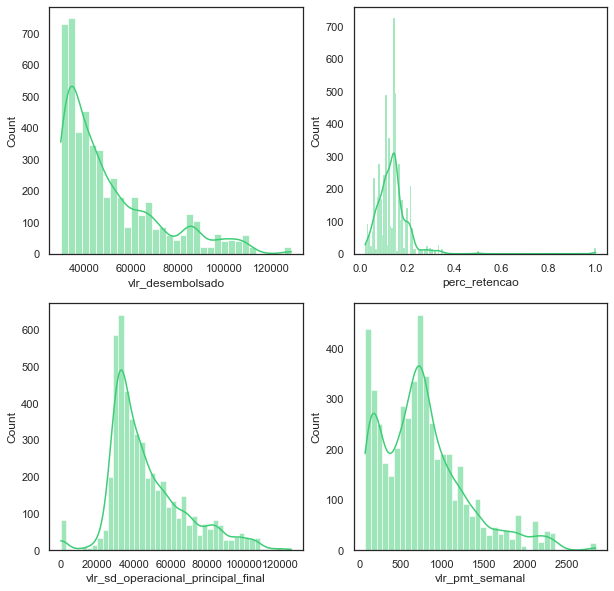

In [9]:
## > que R$ 30k
teste = df >> filter(_.vlr_desembolsado > 30000,_.vlr_desembolsado < 129316 )
sns.set(style="white")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=teste, x="vlr_desembolsado", kde=True, color="#3ECD77", ax=axs[0, 0])
sns.histplot(data=teste, x="perc_retencao", kde=True, color="#3ECD77", ax=axs[0, 1])
sns.histplot(data=teste, x="vlr_sd_operacional_principal_final", kde=True, color="#3ECD77", ax=axs[1, 0])
sns.histplot(data=teste, x="vlr_pmt_semanal", kde=True, color="#3ECD77", ax=axs[1, 1])

## Lidando com as inconsistências das colunas: dsc_tipo empresa, geographykey e mcckey:
#### Na tentativa de diminuir o número de NaN's presentes nas colunas, foi utilizado o Interpolate do Pandas, que permite preencher os NaN's utilizando o método de interpolação desejado. No caso da base de dados analisada, o método escolhido foi o "pad", que utiliza valores existentes para preencher o valor faltante. Para mais informações, acesse: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate 


In [3]:
teste = df >> group_by(_.Id) >> mutate(geo_key_teste = _.geographykey.interpolate(method ="pad", limit_direction="forward")) >> mutate(geo_key_teste = _.geo_key_teste.ffill(limit=1).bfill(limit=1)) >> ungroup()
teste = teste >> group_by(_.Id) >> mutate(mcckey_teste = _.mcckey.interpolate(method ="pad", limit_direction="forward")) >> mutate(mcckey_teste = _.mcckey_teste.ffill(limit=1).bfill(limit=1)) >> ungroup()
teste = teste >> group_by(_.Id) >> mutate(tipoempresa_teste = _.dsc_tipo_empresa.interpolate(method ="pad", limit_direction="forward")) >> mutate(tipoempresa_teste = _.tipoempresa_teste.ffill(limit=1).bfill(limit=1)) >> ungroup()


##### Como podemos ver, as novas colunas criadas possuem bem menos NaN's que as da base original. Mas ainda assim é necessário observar o padrão das observações que não conseguiram ser preenchidas.

In [4]:
print(" \nTotal de NaN em cada coluna do DataFrame : \n\n",
      teste.isnull().sum()) 

 
Total de NaN em cada coluna do DataFrame : 

 Id                                        0
dt_desembolso                             0
prazo_meses                               0
vlr_desembolsado                          0
perc_retencao                             0
vlr_pmt_semanal                           0
vlr_pagamento_semanal                     0
vlr_tpv_acumulado_7d                      0
vlr_sd_operacional_final                  0
vlr_sd_operacional_principal_final        0
dsc_tipo_empresa                      18184
geographykey                          67791
mcckey                                67791
dt_referencia                             0
geo_key_teste                         22000
mcckey_teste                          22000
tipoempresa_teste                     17890
dtype: int64


##### Aqui podemos ver as estatísticas descritivas da base que contém somente as observações com NaN's. É possível perceber que, após a primeira imputação, todas as observações possuem NaN's em todas as colunas modificadas. Esse fato torna, ao meu ver, a imputação dos dados impossível. Talvez a aplicação de um algoritimo de Matching (PSM, CEM) resolva o problema, ao imputar os dados de acordo com as outras características observadas dos clientes, mas creio que seja "overkill". Um ajuste com a equipe que têm contato direto com os clientes seria o ideal, já que os clientes com dados faltantes já estão identificados, facilitando o contato e, a posteriori, a imputação dos dados na base.

In [5]:
teste2 = teste >> group_by(_.Id) >> filter(_.geo_key_teste.isna() | _.tipoempresa_teste.isna() | _.mcckey_teste.isna()) >> ungroup()

In [11]:
teste2.describe()

,Id,prazo_meses,vlr_desembolsado,perc_retencao,vlr_pmt_semanal,vlr_pagamento_semanal,vlr_tpv_acumulado_7d,vlr_sd_operacional_final,vlr_sd_operacional_principal_final,geographykey,mcckey,geo_key_teste,mcckey_teste
count,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.000000,22000.0,22000.000000,22000.000000,0.0,0.0,0.0,0.0
mean,494014.485636,16.534545,6302.387693,0.126996,119.990283,96.546914,0.0,5781.540149,5678.666868,NaN,NaN,NaN,NaN
std,290077.171719,2.571879,11905.475055,0.087763,236.355154,391.255095,0.0,11312.637007,11014.164130,NaN,NaN,NaN,NaN
min,575.000000,6.000000,0.942623,0.010000,0.003167,-135.745277,0.0,-0.064221,-0.064221,NaN,NaN,NaN,NaN
25%,242931.000000,15.000000,736.684890,0.080000,11.726324,0.117383,0.0,606.964673,589.898584,NaN,NaN,NaN,NaN
50%,492316.000000,15.000000,2355.157063,0.124400,39.700644,16.253886,0.0,2045.976324,1990.431355,NaN,NaN,NaN,NaN
75%,741501.000000,18.000000,7005.262809,0.150000,124.689833,82.979193,0.0,6292.371008,6184.148157,NaN,NaN,NaN,NaN
max,999741.000000,21.000000,111742.509398,1.000000,2357.215266,35095.553559,0.0,131638.985825,111742.509398,NaN,NaN,NaN,NaN


##### Uma outra característica estranha das observações que não tiveram os dados imputados é que, em todas, o Valor transacionado (venda) acumulado é nulo, levando a entender que o cliente não teve caixa no período, muitas vezes não efetuando o pagamento semanal.


In [15]:
teste2['vlr_tpv_acumulado_7d'].mean()
print(" \nNúmero de Clientes sem os dados imputados: : \n\n",
      teste2['Id'].unique().size)

 
Número de Clientes sem os dados imputados: : 

 1935


<AxesSubplot:xlabel='vlr_pagamento_semanal', ylabel='Count'>

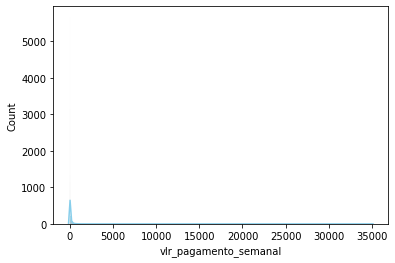

In [13]:
sns.histplot(data=teste2, x="vlr_pagamento_semanal", kde=True, color="#3ECD77")

In [7]:
print(" \nTotal de NaN em cada coluna do DataFrame : \n\n",
      teste2.isnull().sum()) 

 
Total de NaN em cada coluna do DataFrame : 

 Id                                        0
dt_desembolso                             0
prazo_meses                               0
vlr_desembolsado                          0
perc_retencao                             0
vlr_pmt_semanal                           0
vlr_pagamento_semanal                     0
vlr_tpv_acumulado_7d                      0
vlr_sd_operacional_final                  0
vlr_sd_operacional_principal_final        0
dsc_tipo_empresa                      17907
geographykey                          22000
mcckey                                22000
dt_referencia                             0
geo_key_teste                         22000
mcckey_teste                          22000
tipoempresa_teste                     17890
dtype: int64


<AxesSubplot:xlabel='vlr_pmt_semanal', ylabel='Count'>

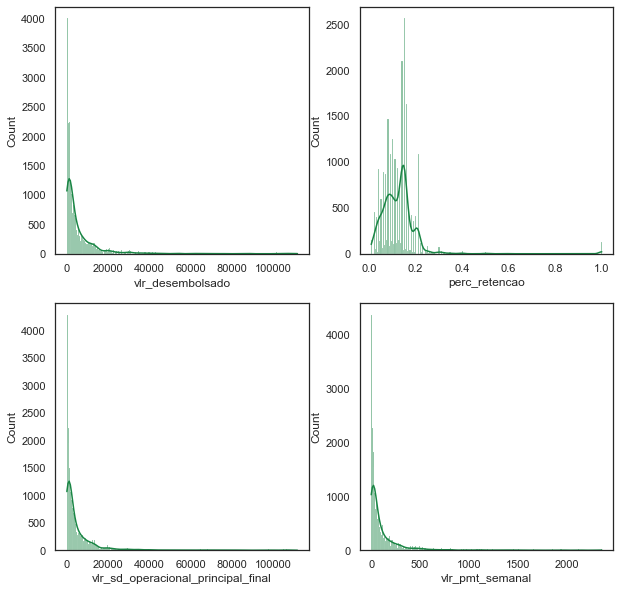

In [9]:
## Estatísticas das observações que não tiveram os dados imputados
sns.set(style="white")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=teste2, x="vlr_desembolsado", kde=True, color="#198544", ax=axs[0, 0])
sns.histplot(data=teste2, x="perc_retencao", kde=True, color="#198544", ax=axs[0, 1])
sns.histplot(data=teste2, x="vlr_sd_operacional_principal_final", kde=True, color="#198544", ax=axs[1, 0])
sns.histplot(data=teste2, x="vlr_pmt_semanal", kde=True, color="#198544", ax=axs[1, 1])

## Saúde da carteira

In [15]:
print(" \nTamanho da carteira de crédito : \n\n",
      "R$:", "{:20,.2f}".format(float(df['vlr_desembolsado'].unique().sum())))

 
Tamanho da carteira de crédito : 

 R$:        41,640,459.59


In [10]:
df >> group_by(_.dsc_tipo_empresa) >> summarize(media = _.vlr_desembolsado.mean()) ##Valor desembolsado médio, por tipo de empresa

,dsc_tipo_empresa,media
0,MEI,3802.846093
1,PF,5187.266944
2,PJ,7563.767109


##### Os clientes estão com valor emprestado menor que o valor do saldo da dívida?

In [17]:
df["semana"] = df.groupby('Id').cumcount()
df['semana'] =  df['semana']+1 ## cria contador de semanas, por ID
df['prazo_semanas'] = round(df['prazo_meses']*4.34) ## cria o prazo em semanas, por ID

In [18]:
df = df >>\
    group_by(_.Id) >> \
    mutate( pgt_semana = _.vlr_pagamento_semanal - _.vlr_pmt_semanal) >>\
    ungroup() ## verificando sese os clientes estão pagando mais ou menos que o esperado por semana.


In [19]:
df2 = df.groupby("Id").agg(valor_emprestado=pd.NamedAgg(column="vlr_desembolsado", aggfunc="mean"),
    saldo_divida=pd.NamedAgg(column="vlr_sd_operacional_final", aggfunc="last"),
    semana_vigente=pd.NamedAgg(column="semana", aggfunc="last"),
    data_referencia=pd.NamedAgg(column="dt_referencia", aggfunc="last"),
    prazo_semanas=pd.NamedAgg(column="prazo_semanas", aggfunc="last"),
    Id=pd.NamedAgg(column="Id", aggfunc="last")) ## Dataframe com um Id por linha

In [20]:
df2["diferenca"] = df2['valor_emprestado'] - df2['saldo_divida']

In [21]:
df2 = df2 >> \
    mutate(situacao = if_else(_.diferenca <0, "Menor", "Maior")) ## Adicionando coluna identificadora de situacao, maior ou menor que o valor emprestado.

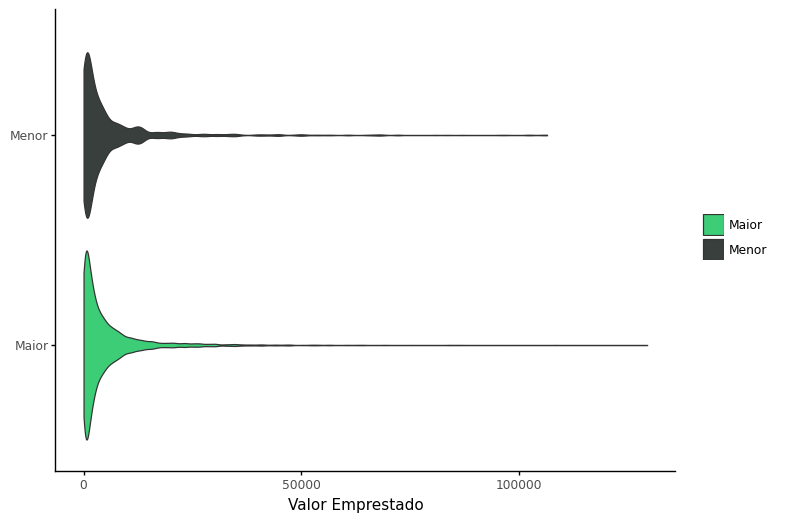

<ggplot: (173604731519)>

In [38]:
## Distribuição do valor emprestado, por situação dos clientes

(ggplot(df2, aes('situacao', 'valor_emprestado', fill ="situacao"))
 + geom_violin(df2)
 + scale_fill_manual(values=["#3ECD77", "#393F3C"])
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + coord_flip()        # flipping the x- and y-axes
 + labs(title='', x='', y='Valor Emprestado') 
)

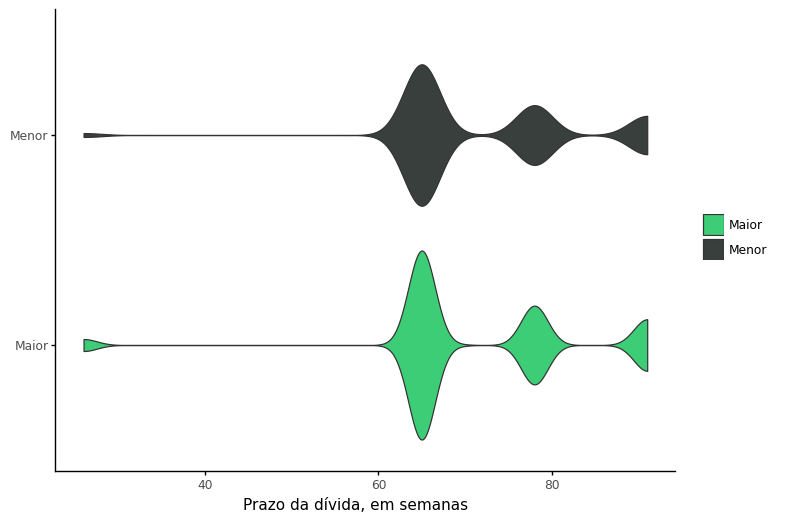

<ggplot: (173613460113)>

In [43]:
## Distribuição do prazo da dívida, por situação dos clientes

(ggplot(df2, aes('situacao', 'prazo_semanas', fill ="situacao"))
 + geom_violin(df2)
 + scale_fill_manual(values=["#3ECD77", "#393F3C"])
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + coord_flip()        # flipping the x- and y-axes
 + labs(title='', x='', y='Prazo da dívida, em semanas') 
)

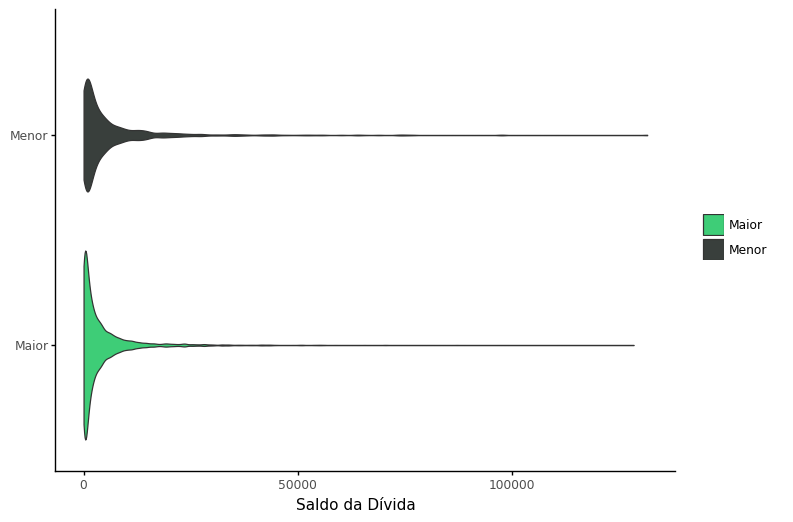

<ggplot: (173613456312)>

In [42]:
## Distribuição do saldo da dívida, por situação dos clientes

(ggplot(df2, aes('situacao', 'saldo_divida', fill ="situacao"))
 + geom_violin(df2)
 + scale_fill_manual(values=["#3ECD77", "#393F3C"])
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + coord_flip()        # flipping the x- and y-axes
 + labs(title='', x='', y='Saldo da Dívida') 
)

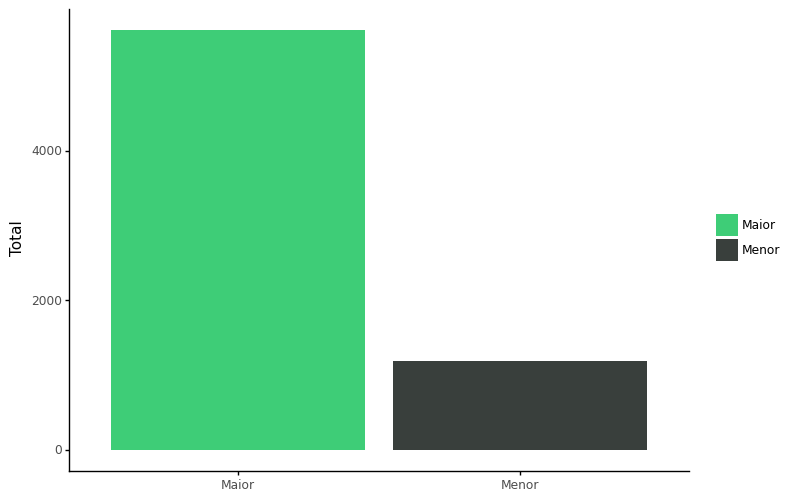

<ggplot: (173602517670)>

In [39]:
### Total de clientes, por situação

df3 = df2 >> \
    group_by(_.situacao) >> \
    summarize(Total = _.diferenca.count())

(ggplot(df3, aes('situacao', 'Total', fill ="situacao"))
 + geom_col(stat='identity', position='dodge')
 + scale_fill_manual(values=["#3ECD77", "#393F3C"])
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + labs(title='', x='', y='Total') 
)

In [14]:
## Os top 100 clientes, por valor do empréstimo
df["vlr_desembolsado"].nlargest(10)

49831    129316.965643
49832    129316.965643
49833    129316.965643
49834    129316.965643
49835    129316.965643
49836    129316.965643
49837    129316.965643
49838    129316.965643
49839    129316.965643
49840    129316.965643
Name: vlr_desembolsado, dtype: float64

In [40]:
### Criando dataframe com os identificadores, disponíveis nas bases geo_decode e mcc_decode
df_merge = teste >> \
    select(_.Id, _.geo_key_teste, _.mcckey_teste, _.tipoempresa_teste, _.prazo_meses, _.perc_retencao) >> \
    group_by(_.Id) >> \
    ungroup()
    
df_merge = df_merge.dropna()

df_merge = df_merge >> \
    select(_.Id, _.geo_key_teste, _.mcckey_teste, _.tipoempresa_teste, _.prazo_meses, _.perc_retencao) >> \
    group_by(_.Id) >> \
    distinct(_.Id,_keep_all= True) >> \
    ungroup()

In [45]:
### Adicionando os dicionários

df_merge = df_merge.merge(geo_decode, how='left', left_on='geo_key_teste', right_on='geographykey')
df_merge = df_merge.merge(mcc_decode, how='left', left_on='mcckey_teste', right_on='mcckey')

In [46]:
df_merge = df_merge >> \
    select(_.Id, _.tipoempresa_teste, _.statename, _.mccname, _.mccclusternew, _.prazo_meses, _.perc_retencao) >> \
    mutate(Id_novo = _.Id)
    
df2.index.name = None
    
df_merge = df_merge.merge(df2,how='left',left_on="Id_novo", right_on="Id" ) ## base com os dicionarios 

##### Por setor

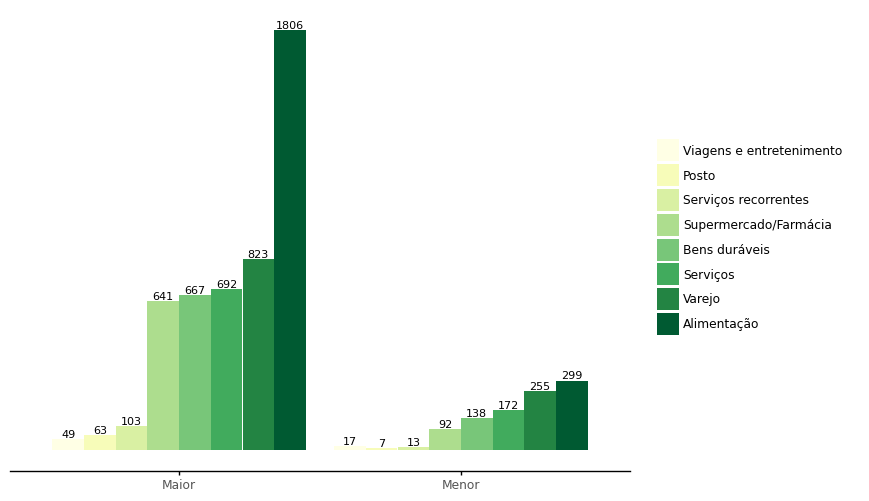

<ggplot: (109506430353)>

In [47]:
## Número de clientes com valor emprestado maior e menor que o saldo da dívida, por setor.

df_merge['mccclusternew'].value_counts()


df4 = df_merge >> \
    group_by(_.situacao, _.mccclusternew) >> \
    summarize(Total = _.diferenca.count()) >> \
    arrange(_.Total)

dodge_text = position_dodge(width=0.9)
ccolor = '#555555'

(ggplot(df4, aes(x='situacao', y='Total', fill='reorder(mccclusternew,Total)'))
 + geom_col(stat='identity', position='dodge')
 + scale_fill_brewer(palette="YlGn")
 + geom_text(aes(label='Total'),
             position=dodge_text,
             size=8, va='bottom')
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + labs(title='', x='', y='Total')
 + theme(panel_background=element_rect(fill='white'),              
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
                                               
)



#### Por tipo

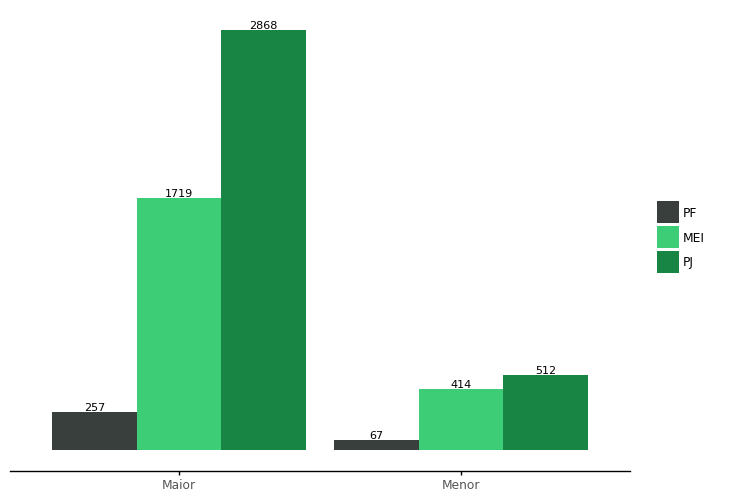

<ggplot: (173626131185)>

In [47]:
## Número de clientes com valor emprestado maior e menor que o saldo da dívida, por tipo.
df4 = df_merge >> \
    group_by(_.situacao, _.tipoempresa_teste) >> \
    summarize(Total = _.diferenca.count()) >> \
    arrange(_.Total)

dodge_text = position_dodge(width=0.9)
ccolor = '#555555'

(ggplot(df4, aes(x='situacao', y='Total', fill='reorder(tipoempresa_teste,Total)'))
 + geom_col(stat='identity', position='dodge')
 + geom_text(aes(label='Total'),
             position=dodge_text,
             size=8, va='bottom')
 + scale_fill_manual(values=["#393F3C","#3ECD77", "#198544"])
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + labs(title='', x='', y='Total')
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
                                               
)



#### Por localização

In [51]:
## Filtrei os top 8 locais com mais clientes para melhorar a visualização

top_maiores = df_merge >> \
    group_by(_.situacao, _.statename) >> \
    summarize(Total = _.diferenca.count()) >>\
    filter(_.situacao == "Maior") >> \
    arrange(_.Total)
    
top_maiores = top_maiores.tail(8).reset_index()

top_menores = df_merge >> \
    group_by(_.situacao, _.statename) >> \
    summarize(Total = _.diferenca.count()) >>\
    filter(_.situacao == "Menor") >> \
    arrange(_.Total)
    
top_menores = top_menores.tail(8).reset_index()

topn = pd.concat([top_maiores,top_menores])


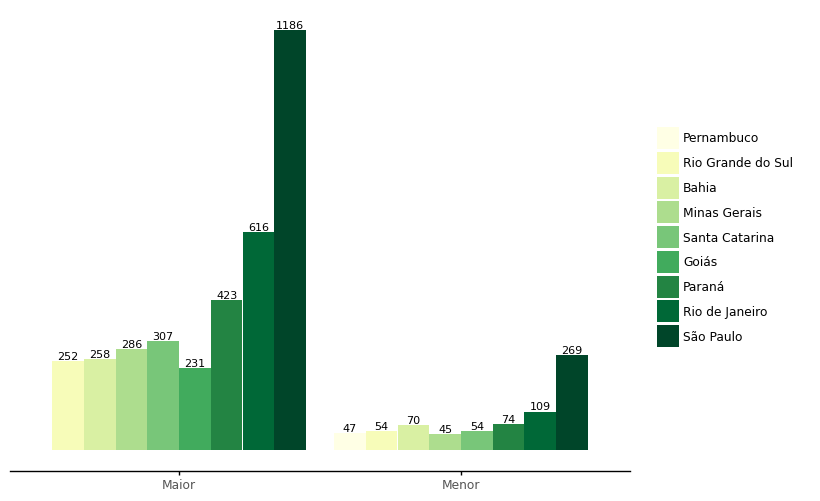

<ggplot: (173626290011)>

In [52]:
## Número de clientes com valor emprestado maior e menor que o saldo da dívida, por localização.
df4 = df_merge >> \
    group_by(_.situacao, _.statename) >> \
    summarize(Total = _.diferenca.count()) >> \
    arrange(_.Total)
    

    
dodge_text = position_dodge(width=0.9)
ccolor = '#555555'


(ggplot(topn, aes(x='situacao', y='Total', fill='reorder(statename, Total)'))
 + geom_col(stat='identity', position='dodge')
 + geom_text(aes(label='Total'),
             position=dodge_text,
             size=8, va='bottom')
 + scale_fill_brewer(palette="YlGn")
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + labs(title='', x='', y='Total')
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
                                               
)

#### Por percentual de rentenção

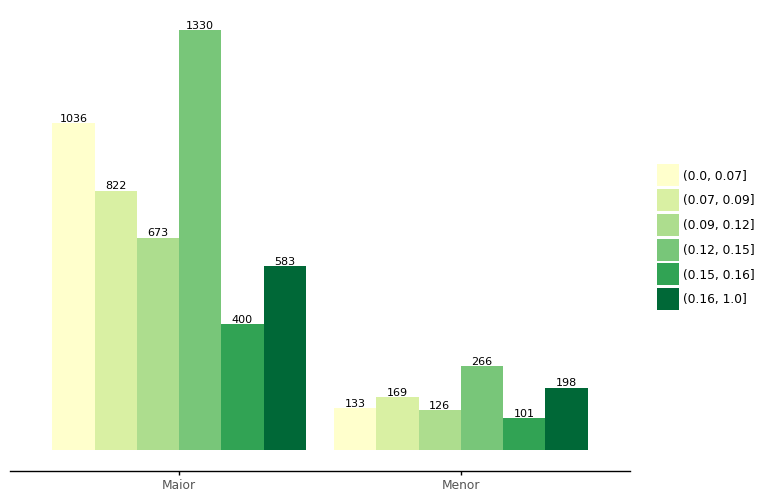

<ggplot: (173613725010)>

In [54]:
## Número de clientes com valor emprestado maior e menor que o saldo da dívida, por percentual de retenção.

df_merge['bins'] = pd.qcut(df_merge['perc_retencao'], 6, precision=0)
df4 = df_merge >> \
    group_by(_.situacao, _.bins) >> \
    summarize(Total = _.diferenca.count()) >> \
    arrange(_.Total)

dodge_text = position_dodge(width=0.9)
ccolor = '#555555'

(ggplot(df4, aes(x='situacao', y='Total', fill='bins'))
 + geom_col(stat='identity', position='dodge')
 + geom_text(aes(label='Total'),
             position=dodge_text,
             size=8, va='bottom')
 + scale_fill_brewer(palette="YlGn")
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + labs(title='', x='', y='Total')
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
                                               
)

#### Por prazo de duração

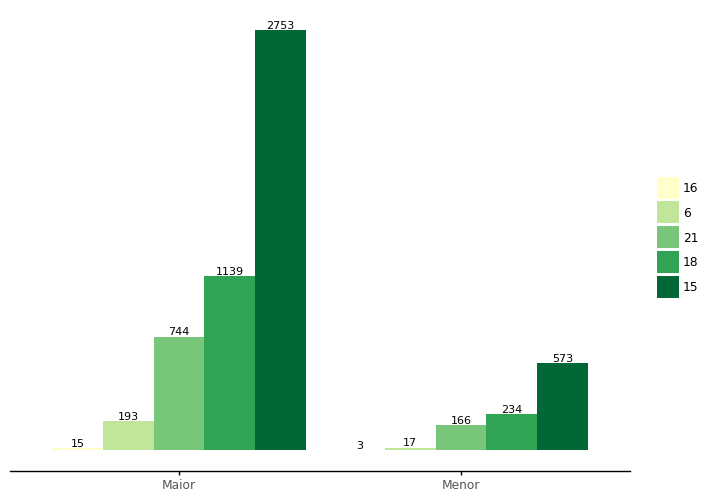

<ggplot: (173613758868)>

In [55]:
## Número de clientes com valor emprestado maior e menor que o saldo da dívida, por prazo de duração.
df4 = df_merge >> \
    group_by(_.situacao, _.prazo_meses) >> \
    summarize(Total = _.diferenca.count()) >> \
    arrange(_.Total)

dodge_text = position_dodge(width=0.9)
ccolor = '#555555'

(ggplot(df4, aes(x='situacao', y='Total', fill='reorder(prazo_meses, Total)'))
 + geom_col(stat='identity', position='dodge')
 + geom_text(aes(label='Total'),
             position=dodge_text,
             size=8, va='bottom')
 + scale_fill_brewer(palette="YlGn")
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + labs(title='', x='', y='Total')
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
                                               
)

### Os clientes estão pagando mais ou menos que o esperado por semana?

In [3]:
df["semana"] = df.groupby('Id').cumcount()
df['semana'] =  df['semana']+1 ## cria contador de semanas, por ID
df['prazo_semanas'] = round(df['prazo_meses']*4.34) ## cria o prazo em semanas, por ID

In [6]:
df = df >>\
    group_by(_.Id) >> \
    mutate( pgt_semana = _.vlr_pagamento_semanal - _.vlr_pmt_semanal) >>\
    mutate(saldo = if_else(_.pgt_semana < 0, "Negativo", "Positivo")) >>\
    ungroup() ## verificando se os clientes estão pagando mais ou menos que o esperado por semana.


In [12]:
positivos = df >>\
    group_by(_.dt_referencia) >>\
    filter(_.saldo == "Positivo") >>\
    summarize(positivo = _.saldo.count())
    
negativos = df >>\
    group_by(_.dt_referencia) >>\
    filter(_.saldo == "Negativo") >>\
    summarize(negativo = _.saldo.count())

In [13]:
merge_semana = positivos.merge(negativos, how='left', on="dt_referencia") ## Data frame com o número de pagamentos maiores e menores que o esperado por semana.

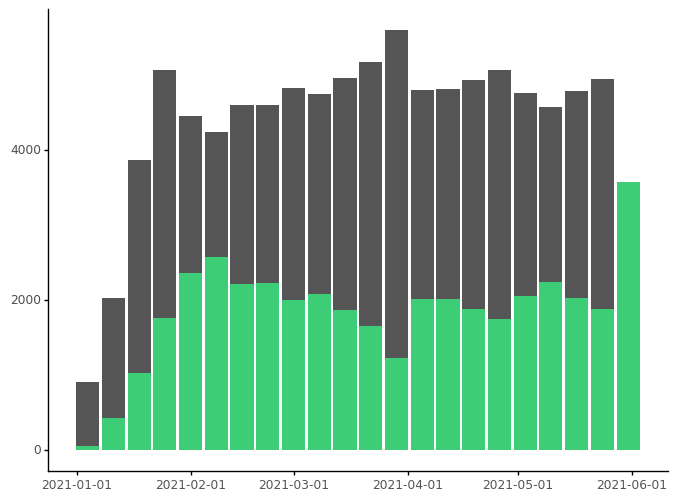

<ggplot: (135245376509)>

In [23]:
## Número de pagamentos por semana, classificados entre maiores e menores que o valor esperado.
ccolor = '#555555'
(ggplot(merge_semana, aes(x='dt_referencia', y='positivo'))
 + geom_col(mapping= aes(x='dt_referencia', y='negativo'),fill = ccolor)
 + geom_col(stat='identity',position= "dodge", fill = "#3ECD77")
 + theme_classic()
 + theme(figure_size=(8, 6))
 + labs(title='', x='', y='Total')
 + theme(panel_background=element_rect(fill='white'),               
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_text_x=element_text(color=ccolor),
         panel_grid=element_blank())
                                               
)

In [5]:
inads = df >>\
    group_by(_.Id) >> \
    summarize(soma = _.pgt_semana.sum()) >> \
    mutate(saldo = if_else(_.soma < 0, "Negativo", "Positivo")) >> \
    ungroup()
    
inads['saldo'].value_counts()
    

        

Negativo    4584
Positivo    2222
Name: saldo, dtype: int64

In [26]:
inads.nsmallest(10,'soma') ##10 piores pagadores

,Id,soma,saldo
1045,153352,-42764.422192,Negativo
3100,447172,-42732.291255,Negativo
1134,164606,-31103.474452,Negativo
2379,341125,-25821.164278,Negativo
4788,697658,-24715.995754,Negativo
4176,607451,-22805.242648,Negativo
4267,619959,-21808.310508,Negativo
2093,302166,-21479.500396,Negativo
1174,170432,-20798.345214,Negativo
865,125498,-19993.975493,Negativo


## Serie Temporal do Valor Esperado, Valor Recebido e Montante


In [24]:

serie_evolucao = df >> \
    group_by(_.dt_referencia) >> \
    summarize(valor_recebido = _.vlr_pagamento_semanal.sum().round(3),
              valor_esperado = _.vlr_pmt_semanal.sum().round(3)) >> \
    arrange(_.dt_referencia) >> \
    mutate(Recebido = np.cumsum(_.valor_recebido).round(3),
           Esperado = np.cumsum(_.valor_esperado).round(3))
    

In [25]:
serie_evolucao["tamanho_carteira"] = float(df['vlr_desembolsado'].unique().sum())

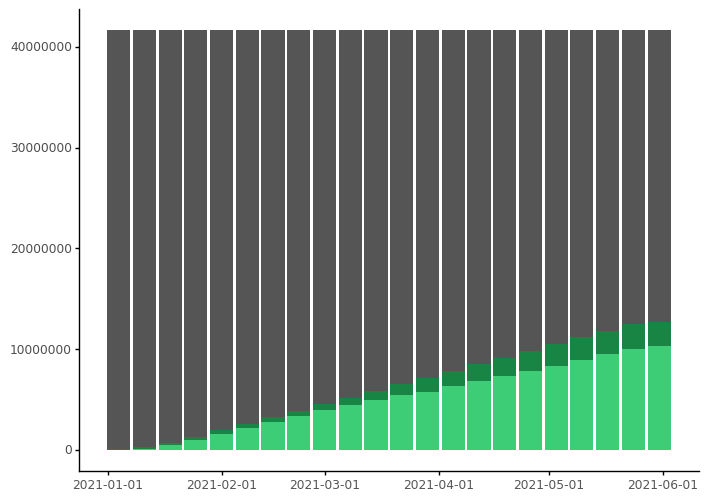

<ggplot: (173603853041)>

In [31]:
ccolor = '#555555'
(ggplot(serie_evolucao, aes(x='dt_referencia', y='Recebido'))
 + geom_col(mapping= aes(x='dt_referencia', y='tamanho_carteira'),fill = ccolor)
 + geom_col(mapping= aes(x='dt_referencia', y='Esperado'),fill = "#198544")
 + geom_col(stat='identity', position='dodge', fill = "#3ECD77")
 + theme_classic()
 + theme(figure_size=(8, 6))
 + labs(title='', x='', y='Total')
 + theme(panel_background=element_rect(fill='white'),               
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_text_x=element_text(color=ccolor),
         panel_grid=element_blank())
                                               
)

## Clustering
#### O objetivo é procurar uma boa maneira de entender a relação entre as variáveis observadas e analisar se os clientes podem ser divididos em clusters. Para a clusterização, irei utilizar o algorítimo de K-Means que, resumidamente, é um algorítimo de Machine Learning que agrupa os dados em k agrupamentos. O número de clusters é definido pelo analista, portanto cabe utilizar um método que otimize o número de clusters a ser escolhido. O método escolhido foi o Elbow. O método de Elbow consiste em rodar o K-means para um vetor de número de clusters, calculando, para cada K-mean, a soma das distâncias (Euclídeanas) quadradas de cada ponto ao seu centro atribuído. Essas distâncias são chamadas de distorções, que serão plotadas no gráfico e o ponto de inflexão dessa curva determina o melhor valor de K.

#### Valor desembolsado e Prazo

In [11]:
# Definindo melhor número de clusters
columns = ['vlr_desembolsado', 'prazo_meses']
cluster_data = df.loc[:, columns]

In [12]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_data)
    distortions.append(kmeanModel.inertia_)

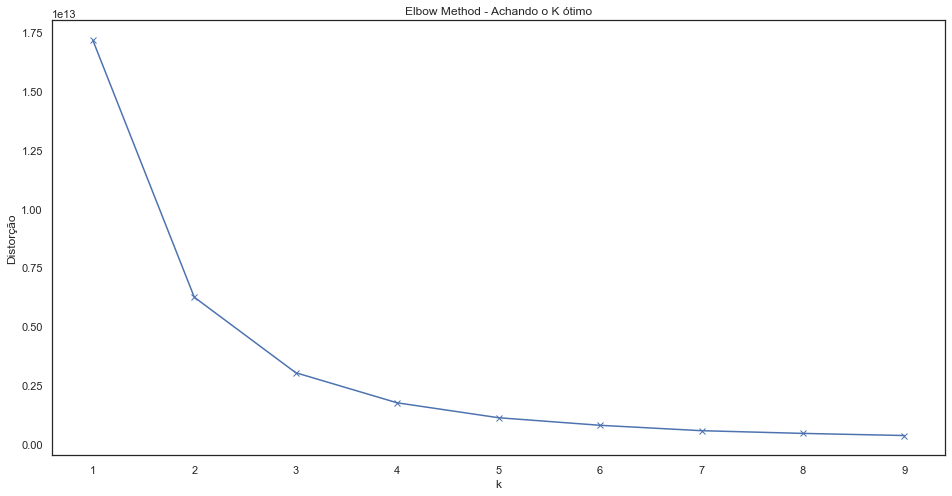

In [13]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Elbow Method - Achando o K ótimo')
plt.show()

In [82]:
## fitando para k=2
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(cluster_data)

KMeans(n_clusters=2)

In [83]:
cluster_data['k_means']=kmeanModel.predict(cluster_data)

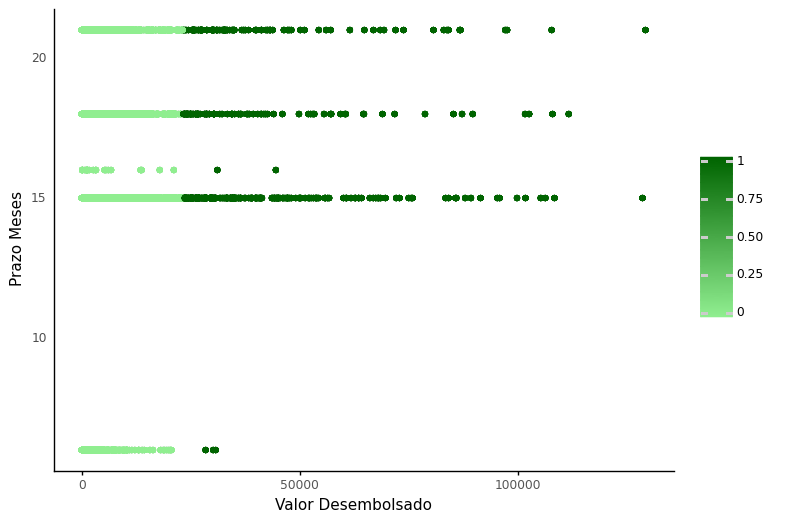

<ggplot: (173676760778)>

In [84]:
(ggplot(cluster_data, aes(x='vlr_desembolsado', y='prazo_meses', color = "k_means"))
 + geom_point()
 + theme_classic()
 + scale_color_gradient(low="lightgreen",high="darkgreen")
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + labs(title='', x='Valor Desembolsado', y='Prazo Meses')
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_line_x=element_line(color='black'),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
                                               
)

#### Valor desembolsado e percentual de retenção

In [70]:
# Definindo melhor número de clusters
columns = ['vlr_desembolsado', 'perc_retencao']
cluster_data = df.loc[:, columns]

In [71]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_data)
    distortions.append(kmeanModel.inertia_)

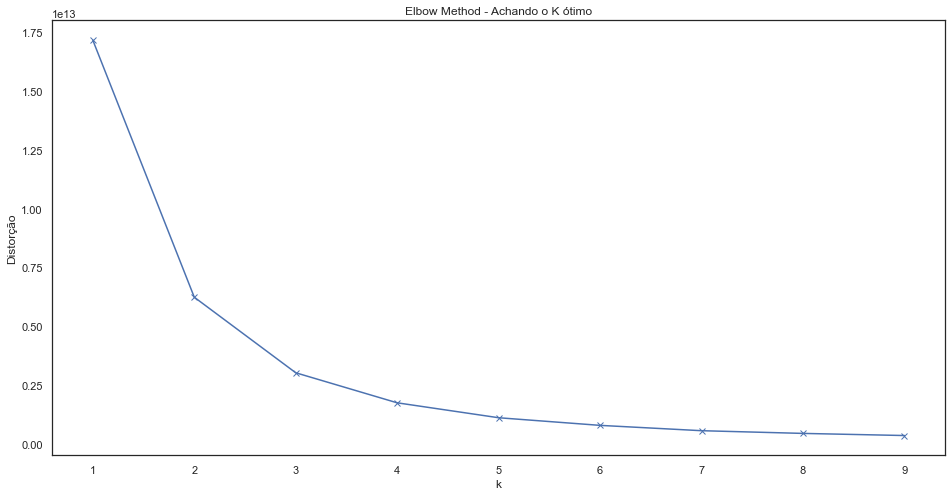

In [72]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.title('Elbow Method - Achando o K ótimo')
plt.show()

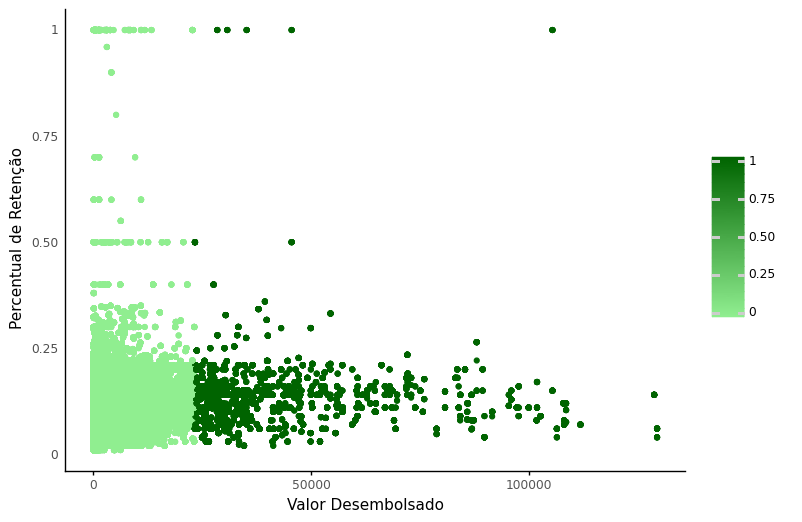

<ggplot: (173673948136)>

In [78]:
## fitando para k=2
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(cluster_data)

cluster_data['k_means']=kmeanModel.predict(cluster_data)

(ggplot(cluster_data, aes(x='vlr_desembolsado', y='perc_retencao', color = "k_means"))
 + geom_point()
 + scale_color_gradient(low="lightgreen",high="darkgreen")
 + theme_classic()
 + theme(figure_size=(8, 6), legend_title= element_blank())
 + labs(title='', x='Valor Desembolsado', y='Percentual de Retenção')
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_line_x=element_line(color='black'),
         axis_text_x=element_text(color=ccolor),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
                                               
)